[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/convergence.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=examples/PySDM_examples/deJong_Mackay_et_al_2023/convergence.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/convergence.ipynb)

In [1]:
import os
import sys
from datetime import datetime
import json
from open_atmos_jupyter_utils import show_plot

import numpy as np
from matplotlib import pyplot

import numba



In [2]:
from perf_comp.utils import plot_processed_results, plot_time_per_step

# Analyse

In [3]:
folder_path = './perf_comp_results/'
result_files = os.listdir(folder_path)

In [4]:
result_files.sort()

In [5]:
result_files

['.ipynb_checkpoints',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-breakup-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-coalescence-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-breakup-double-n_steps100.txt',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-coalescence-double-n_steps100.txt',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144-coal-break-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144-results-2023-09-17_22:09:19.858144-coal+breakup-double-n_steps2048.txt',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-18_02_31_02.372915-coal-break-products',
 'gmum_cpu_env_fun_totnum_dv_info2023-09-18_02_31_02.372915-results-2023-09-18_02_31_02.372915-coal+breakup-double-n_steps2048.txt',
 'gmum_cpu_env_info',
 'gmum_cpu_env_info-results-2023-09-10 14:4

In [6]:
def read_dict_from_file(filename):
    with open(filename, "r") as fp:
        d = json.load(fp)
        assert all(['Thrust' or 'Numba' in k for k in d.keys()])
        
        for backend in d.keys():
            for n_sd in d[backend]:
                assert str(int(n_sd)) == n_sd
                tmp = d[backend][n_sd]

                del d[backend][n_sd]
                d[backend][int(n_sd)] = tmp
        
        return d

In [7]:
SELECTED_BACKENDS = {'Numba_10': 'Numba_10', 'Numba_1': 'Numba_1', 'ThrustRTC': 'ThrustRTC'}

def get_dict_with_selected_backends(d):
    return { v: d[k] for k, v in SELECTED_BACKENDS.items()}
    

# Scaling total number and dv

## CPU

In [8]:
gmum_cpu_dv_and_totnum_scaled_breakup_double = read_dict_from_file(
    folder_path+
'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-breakup-double-n_steps100.txt'
)

gmum_cpu_dv_and_totnum_scaled_coal_double = read_dict_from_file(
    folder_path+
 'gmum_cpu_env_fun_totnum_dv_info2023-09-16_19:26:08.991573-results-2023-09-16_19:26:08.991573-coalescence-double-n_steps100.txt'
)

gmum_cpu_dv_and_totnum_scaled_coal_breakup_double = read_dict_from_file(
    folder_path+
 'gmum_cpu_env_fun_totnum_dv_info2023-09-17_22:09:19.858144-results-2023-09-17_22:09:19.858144-coal+breakup-double-n_steps2048.txt'
)

gmum_cpu_dv_and_totnum_scaled_coal_breakup_double1 = read_dict_from_file(
    folder_path+
 'gmum_cpu_env_fun_totnum_dv_info2023-09-18_02_31_02.372915-results-2023-09-18_02_31_02.372915-coal+breakup-double-n_steps2048.txt',
)

In [347]:
gmum_cpu_dv_and_totnum_scaled_coal_breakup_double

{'Numba_10': {8: {'mean': 0.00010605785064399242,
   'std': 1.2482158730486183e-06,
   'max': 0.00010779313743114471,
   'min': 0.00010490976274013519},
  32: {'mean': 0.0001074525061994791,
   'std': 1.1504809661138393e-06,
   'max': 0.00010905403178185225,
   'min': 0.00010640325490385294},
  256: {'mean': 0.0001159465949361523,
   'std': 7.770065013257423e-07,
   'max': 0.00011694175191223621,
   'min': 0.00011504546273499727},
  1024: {'mean': 0.00015614344738423824,
   'std': 1.7029090838849744e-05,
   'max': 0.00018021732103079557,
   'min': 0.00014353962615132332},
  4096: {'mean': 0.00023210401802013317,
   'std': 1.2371571961795544e-06,
   'max': 0.00023368489928543568,
   'min': 0.00023066438734531403},
  16384: {'mean': 0.000588158261962235,
   'std': 5.9503655627485874e-06,
   'max': 0.0005963587900623679,
   'min': 0.0005824228283017874},
  65536: {'mean': 0.002197252858119706,
   'std': 4.884885772956372e-06,
   'max': 0.00220404879655689,
   'min': 0.002192780375480652},

## GPU

In [10]:
gmum_gpu_dv_and_totnum_scaled_breakup_double = read_dict_from_file(
    folder_path+
'gmum_gpu_env_fun_totnum_dv_info2023-09-17_11:22:04.702157-results-2023-09-17_11:22:04.702157-breakup-double-n_steps100.txt'
)
gmum_gpu_dv_and_totnum_scaled_coal_breakup_double = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_fun_totnum_dv_info2023-09-17_11:22:04.702157-results-2023-09-17_11:22:04.702157-coal+breakup-double-n_steps2048.txt'
)

gmum_gpu_dv_and_totnum_scaled_coal_double = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_fun_totnum_dv_info2023-09-17_11:22:04.702157-results-2023-09-17_11:22:04.702157-coalescence-double-n_steps100.txt'
)


gmum_gpu_dv_and_totnum_scaled_breakup_double1 = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_fun_totnum_dv_info2023-09-17_14:36:08.954527-results-2023-09-17_14:36:08.954527-breakup-double-n_steps100.txt'
)

In [336]:
gmum_gpu_dv_and_totnum_scaled_breakup_double

{'ThrustRTC': {8: {'mean': 0.001686123013496399,
   'std': 3.052754581056782e-05,
   'max': 0.00172607421875,
   'min': 0.001653735637664795},
  32: {'mean': 0.0017551922798156737,
   'std': 4.4014404101680155e-06,
   'max': 0.0017617392539978028,
   'min': 0.0017502403259277344},
  256: {'mean': 0.0017332172393798829,
   'std': 1.2278867689845506e-05,
   'max': 0.001754305362701416,
   'min': 0.0017236065864562988},
  1024: {'mean': 0.0024145448207855227,
   'std': 1.9273805749469062e-05,
   'max': 0.00244265079498291,
   'min': 0.002395150661468506},
  4096: {'mean': 0.0024593967199325563,
   'std': 1.4051857833883626e-05,
   'max': 0.0024750232696533203,
   'min': 0.0024417138099670412},
  16384: {'mean': 0.0024983668327331543,
   'std': 1.4892619068785048e-05,
   'max': 0.002518601417541504,
   'min': 0.0024767255783081053},
  65536: {'mean': 0.002802867889404297,
   'std': 1.4531911345419522e-05,
   'max': 0.002818515300750732,
   'min': 0.0027881669998168945},
  262144: {'mean': 

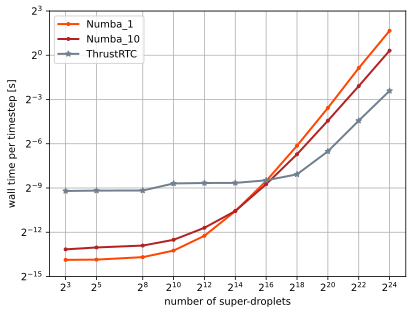

HTML(value="<a href='./coal_n_steps100_double_scaled_totnum_dv.pdf' target='_blank'>./coal_n_steps100_double_s…

In [383]:
coal = { 
    "Numba_1": gmum_cpu_dv_and_totnum_scaled_coal_double['Numba_1'],
    "Numba_10": gmum_cpu_dv_and_totnum_scaled_coal_double['Numba_10'],
    "ThrustRTC": gmum_gpu_dv_and_totnum_scaled_coal_double['ThrustRTC']
}

plot_processed_results(
    coal, 
    # plot_title='coal (n_steps: 100)', 
    plot_filename='coal_n_steps100_double_scaled_totnum_dv.pdf',
    metric='min',
    markers={'Numba_1': '.', 'Numba_10': '.', 'ThrustRTC': '*'},
    colors={'Numba_1': 'orangered', 'Numba_10': 'firebrick', 'ThrustRTC': 'slategray'}
)

In [154]:
gmum_breakup_scaled = {**gmum_cpu_dv_and_totnum_scaled_breakup_double, **gmum_gpu_dv_and_totnum_scaled_breakup_double}

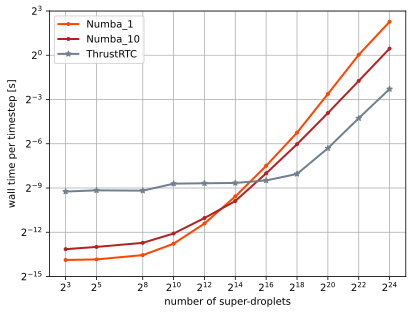

HTML(value="<a href='./breakup_n_steps100_double_scaled_totnum_dv.pdf' target='_blank'>./breakup_n_steps100_do…

In [382]:
breakup = { 
    "Numba_1": gmum_cpu_dv_and_totnum_scaled_breakup_double['Numba_1'],
    "Numba_10": gmum_cpu_dv_and_totnum_scaled_breakup_double['Numba_10'],
    "ThrustRTC": gmum_gpu_dv_and_totnum_scaled_breakup_double['ThrustRTC']
}

plot_processed_results(
    breakup, 
    # plot_title='breakup (n_steps: 100)', 
    metric='min',
    plot_filename='breakup_n_steps100_double_scaled_totnum_dv.pdf',
    
    markers={'Numba_1': '.', 'Numba_10': '.', 'ThrustRTC': '*'},
    colors={'Numba_1': 'orangered', 'Numba_10': 'firebrick', 'ThrustRTC': 'slategray'}
)

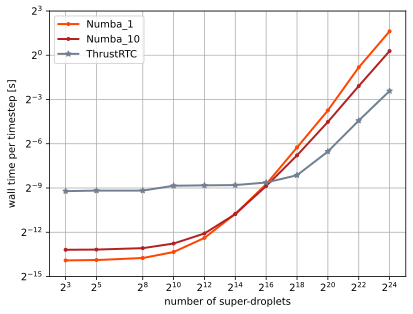

HTML(value="<a href='./coal_breakup_n_steps2048_double_scaled_totnum_dv.pdf' target='_blank'>./coal_breakup_n_…

In [381]:
coal_breakup = {
    "Numba_1": gmum_cpu_dv_and_totnum_scaled_coal_breakup_double1['Numba_1'],
    "Numba_10": gmum_cpu_dv_and_totnum_scaled_coal_breakup_double1['Numba_10'],
    "ThrustRTC": gmum_gpu_dv_and_totnum_scaled_coal_breakup_double['ThrustRTC']
}

plot_processed_results(
    coal_breakup, 
    # plot_title='coal_breakup (n_steps: 2048)', 
    metric='min',
    plot_filename='coal_breakup_n_steps2048_double_scaled_totnum_dv.pdf',
    markers={'Numba_1': '.', 'Numba_10': '.', 'ThrustRTC': '*'},
    colors={'Numba_1': 'orangered', 'Numba_10': 'firebrick', 'ThrustRTC': 'slategray'}
)

In [14]:
# plot_processed_results(
#     gmum_coal_breakup_double_selected, 
#     plot_title=None, #'Coalescence + Breakup double precision (n_steps: 100)', metric='min'
#     plot_filename='coal_breakup_n_steps2048_double_selected.pdf'
# )

# GPU

## Coalescence + Breakup

In [15]:
gmum_gpu_coal_breakup_double_2048 = read_dict_from_file(
    folder_path+
  'gmum_gpu_env_info2023-09-15_03:18:34.519198-results-2023-09-15_03:18:34.519198-coal+breakup-double-n_steps2048.txt'
)

In [16]:
gmum_gpu_coal_breakup_single = read_dict_from_file(
    folder_path+
  'gmum_gpu_env_info2023-09-11_15:46:52.269988-results-2023-09-11 15:46:53.174685-coal+breakup-single.txt'
)

In [17]:
gmum_gpu_coal_breakup_single_weird_bump = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_info2023-09-11_12:21:49.290521-results-2023-09-11 12:21:55.510294-coal+breakup-single.txt'
)

gmum_gpu_coal_breakup_double = read_dict_from_file(
    folder_path+
     'gmum_gpu_env_info2023-09-11_14:24:43.478501-results-2023-09-11 14:24:45.198449-coal+breakup-double.txt'
)

gmum_gpu_coal_breakup_single_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:11:01.151407-results-2023-09-11_17:11:01.151407-coal+breakup-single.txt'

)

gmum_gpu_coal_breakup_double_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:57:02.816929-results-2023-09-11 17:57:04.643939-coal+breakup-double.txt'
)

gpu_coal_breakup_different_configs = {
    'ThrustRTC-single': gmum_gpu_coal_breakup_single_weird_bump['ThrustRTC'], 
    'ThrustRTC-double': gmum_gpu_coal_breakup_double['ThrustRTC'],
    'ThrustRTC-single-wait': gmum_gpu_coal_breakup_single_wait['ThrustRTC'],
    'ThrustRTC-double-wait': gmum_gpu_coal_breakup_double_wait['ThrustRTC'],
}



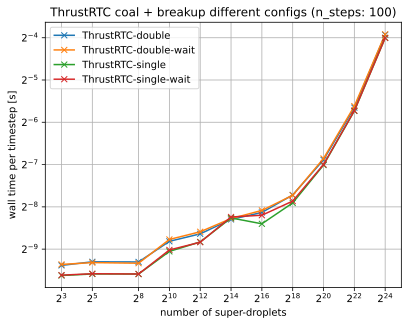

In [18]:
plot_processed_results(
    gpu_coal_breakup_different_configs, 
    plot_title='ThrustRTC coal + breakup different configs (n_steps: 100)', metric='min'
)

## Breakup

In [19]:
gmum_gpu_breakup_single = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_info2023-09-11_12:21:49.290521-results-2023-09-11 12:21:55.510294-breakup-single.txt'
)

gmum_gpu_breakup_double = read_dict_from_file(
    folder_path+
     'gmum_gpu_env_info2023-09-11_14:24:43.478501-results-2023-09-11 14:24:45.198449-breakup-double.txt'
)

gmum_gpu_breakup_single_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:11:01.151407-results-2023-09-11_17:11:01.151407-breakup-single.txt'

)

gmum_gpu_breakup_double_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:57:02.816929-results-2023-09-11 17:57:04.643939-breakup-double.txt'
)

gpu_breakup_different_configs = {
    'ThrustRTC-single': gmum_gpu_breakup_single['ThrustRTC'], 
    'ThrustRTC-double': gmum_gpu_breakup_double['ThrustRTC'],
    'ThrustRTC-single-wait': gmum_gpu_breakup_single_wait['ThrustRTC'],
    'ThrustRTC-double-wait': gmum_gpu_breakup_double_wait['ThrustRTC'],
}



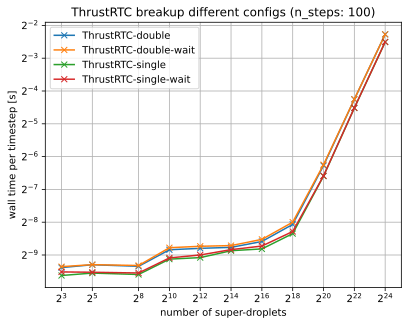

In [20]:
plot_processed_results(
    gpu_breakup_different_configs, plot_title='ThrustRTC breakup different configs (n_steps: 100)', metric='min'
)

## Coalescence

In [21]:
gmum_gpu_coal_double_tot_num1e18 = read_dict_from_file(
    folder_path+
'gmum_gpu_env_tot_num1e18_info2023-09-15_04:09:08.056372-results-2023-09-15_04:09:08.056372-coalescence-double-n_steps100.txt'
)

In [22]:
gmum_gpu_coal_single = read_dict_from_file(
    folder_path+
 'gmum_gpu_env_info2023-09-11_12:21:49.290521-results-2023-09-11 12:21:55.510294-coalescence-single.txt'
)

gmum_gpu_coal_double = read_dict_from_file(
    folder_path+
     'gmum_gpu_env_info2023-09-11_14:24:43.478501-results-2023-09-11 14:24:45.198449-coalescence-double.txt'
)

gmum_gpu_coal_single_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:11:01.151407-results-2023-09-11_17:11:01.151407-coalescence-single.txt'

)

gmum_gpu_coal_double_wait = read_dict_from_file(
    folder_path+
    'gmum_gpu_env_info_wait_True_2023-09-11_17:57:02.816929-results-2023-09-11 17:57:04.643939-coalescence-double.txt'
)

gpu_coal_different_configs = {
    'ThrustRTC-single': gmum_gpu_coal_single['ThrustRTC'], 
    'ThrustRTC-double': gmum_gpu_coal_double['ThrustRTC'],
    'ThrustRTC-single-wait': gmum_gpu_coal_single_wait['ThrustRTC'],
    'ThrustRTC-double-wait': gmum_gpu_coal_double_wait['ThrustRTC'],
}



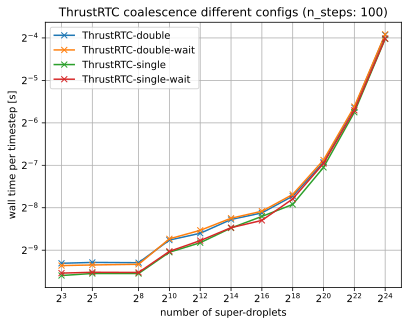

In [23]:
plot_processed_results(
    gpu_coal_different_configs, plot_title='ThrustRTC coalescence different configs (n_steps: 100)', metric='min'
)

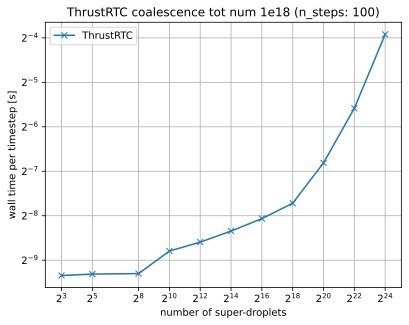

In [24]:
plot_processed_results(
    gmum_gpu_coal_double_tot_num1e18, plot_title='ThrustRTC coalescence tot num 1e18 (n_steps: 100)', metric='min'
)

# CPU

## Coalescence + Breakup

In [25]:
gmum_cpu_coal_breakup_double_2048 = read_dict_from_file(
    folder_path+
   'gmum_cpu_env_info2023-09-15_14:30:51.117081-results-2023-09-15_14:30:51.117081-coal+breakup-double-n_steps2048.txt'
)

In [26]:
gmum_cpu_coal_breakup_double_2 = read_dict_from_file(
    folder_path+'gmum_cpu_env_info-results-2023-09-10 19:58:49.400953-coal+breakup-double.txt'
)
gmum_cpu_coal_breakup_double_2

{'Numba_1': {8: {'mean': 6.724834442138672e-05,
   'std': 4.8012790050998e-07,
   'max': 6.791353225708008e-05,
   'min': 6.679773330688477e-05},
  32: {'mean': 6.857554117838543e-05,
   'std': 7.310872465386685e-07,
   'max': 6.955385208129883e-05,
   'min': 6.779670715332032e-05},
  256: {'mean': 7.707675298055014e-05,
   'std': 7.038433406094624e-07,
   'max': 7.792949676513672e-05,
   'min': 7.620573043823242e-05},
  1024: {'mean': 0.00010596116383870443,
   'std': 2.5387816182713884e-07,
   'max': 0.00010619163513183593,
   'min': 0.0001056075096130371},
  4096: {'mean': 0.0002440182367960612,
   'std': 6.196792058322818e-06,
   'max': 0.00025249481201171874,
   'min': 0.0002378535270690918},
  16384: {'mean': 0.0009155495961507162,
   'std': 4.340085413364398e-06,
   'max': 0.0009211373329162598,
   'min': 0.0009105563163757324},
  65536: {'mean': 0.0033183526992797852,
   'std': 2.7982995414028874e-05,
   'max': 0.0033547592163085936,
   'min': 0.0032867145538330077},
  262144: 

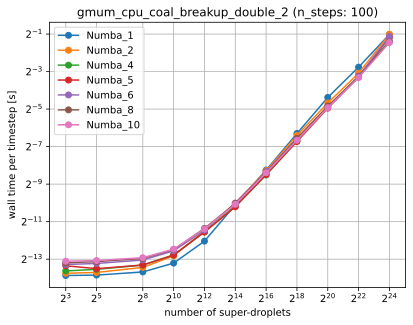

In [27]:
plot_processed_results(gmum_cpu_coal_breakup_double_2, plot_title='gmum_cpu_coal_breakup_double_2 (n_steps: 100)', metric='min')

## Breakup

In [28]:
gmum_cpu_breakup_double_2 = read_dict_from_file(
    folder_path+'gmum_cpu_env_info-results-2023-09-10 19:58:49.400953-breakup-double.txt'
)
gmum_cpu_breakup_double_2

{'Numba_1': {8: {'mean': 6.847063700358073e-05,
   'std': 8.176084995592006e-07,
   'max': 6.908416748046875e-05,
   'min': 6.731510162353515e-05},
  32: {'mean': 6.940523783365884e-05,
   'std': 3.2794665979658337e-07,
   'max': 6.98685646057129e-05,
   'min': 6.915569305419922e-05},
  256: {'mean': 8.502006530761718e-05,
   'std': 6.09717934252941e-08,
   'max': 8.510589599609375e-05,
   'min': 8.496999740600586e-05},
  1024: {'mean': 0.0001383543014526367,
   'std': 7.191973269856387e-07,
   'max': 0.00013930320739746093,
   'min': 0.00013756275177001954},
  4096: {'mean': 0.00034558852513631185,
   'std': 2.5200361355281944e-06,
   'max': 0.0003491091728210449,
   'min': 0.00034334897994995115},
  16384: {'mean': 0.001244348684946696,
   'std': 2.128758245698301e-06,
   'max': 0.0012472915649414064,
   'min': 0.0012423276901245117},
  65536: {'mean': 0.005492118199666341,
   'std': 2.749572407041538e-05,
   'max': 0.005527126789093018,
   'min': 0.005459957122802735},
  262144: {'m

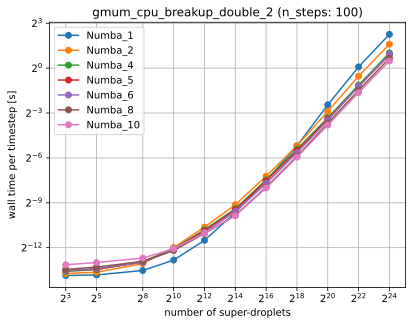

In [29]:
plot_processed_results(gmum_cpu_breakup_double_2, plot_title='gmum_cpu_breakup_double_2 (n_steps: 100)', metric='min')

## Coalsescence

In [31]:
# gmum_cpu_coal_double_tot_num1e18 = read_dict_from_file(
#     folder_path+

# )

In [32]:
gmum_cpu_coalescence_double_2 = read_dict_from_file(
    folder_path+'gmum_cpu_env_info-results-2023-09-10 19:58:49.400953-coalescence-double.txt'
)
# gmum_cpu_coalescence_double_2

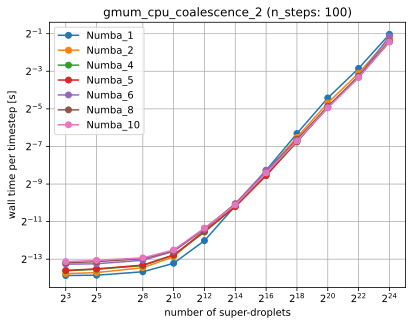

In [33]:
plot_processed_results(gmum_cpu_coalescence_double_2, plot_title='gmum_cpu_coalescence_2 (n_steps: 100)', metric='min')


# CPU + GPU 

## Coalescence

In [34]:
gmum_coalescence_double = {**gmum_cpu_coalescence_double_2, **gmum_gpu_coal_double}

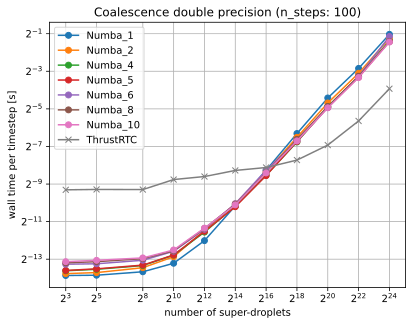

In [35]:
plot_processed_results(
    gmum_coalescence_double, plot_title='Coalescence double precision (n_steps: 100)', metric='min'
)

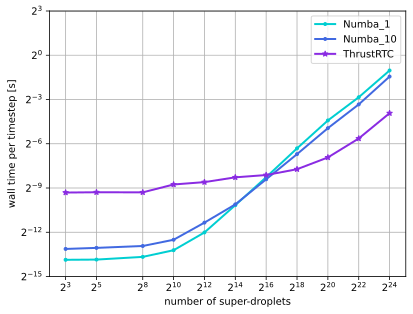

HTML(value="<a href='./coal_n_steps100_double_selected.pdf' target='_blank'>./coal_n_steps100_double_selected.…

In [380]:
gmum_coalescence_double_selected = get_dict_with_selected_backends(gmum_coalescence_double)

plot_processed_results(
    gmum_coalescence_double_selected, 
    plot_title=None, #'Coalescence double precision (n_steps: 100)', metric='min'
    plot_filename='coal_n_steps100_double_selected.pdf',
    markers={'Numba_1': '.', 'Numba_10': '.', 'ThrustRTC': '*'},
    colors={'Numba_1': 'darkturquoise', 'Numba_10': 'royalblue', 'ThrustRTC': 'blueviolet'}
)

## Breakup

In [37]:
gmum_breakup_double = {**gmum_cpu_breakup_double_2, **gmum_gpu_breakup_double}

In [71]:
gmum_cpu_breakup_double_2['Numba_1'][16777216]['min'] / gmum_cpu_breakup_double_2['Numba_10'][16777216]['min']

3.443890979405278

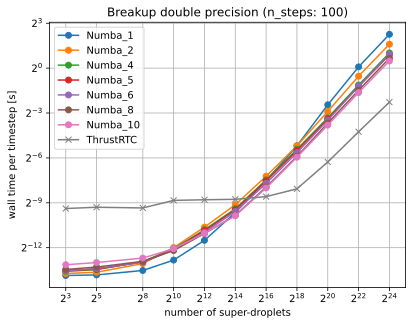

In [39]:
plot_processed_results(
    gmum_breakup_double, plot_title='Breakup double precision (n_steps: 100)', metric='min'
)

In [377]:
from perf_comp.utils import __plot_get_sorted_backend_list, __plot_get_backend_markers, __plot_get_n_sd_list


def plot_processed_results(
    processed_d, show=True, plot_label='', plot_title=None, metric='min', plot_filename=None, markers=None, colors=None
):
  backends = __plot_get_sorted_backend_list(processed_d)

  if markers is None:
    markers = __plot_get_backend_markers(backends)

  x = __plot_get_n_sd_list(backends, processed_d)

  y = []

  for backend in backends:
    y = []
    for n_sd in x:
      v = processed_d[backend][n_sd][metric]
      assert type(v) == int or float, 'must be scalar'
      y.append(v)

    if colors:
        pyplot.plot(x, y, label=backend+plot_label, marker=markers[backend], color=colors[backend], linewidth=2)
    else:
        pyplot.plot(x, y, label=backend+plot_label, marker=markers[backend], linewidth=2)

  pyplot.legend() #bbox_to_anchor =(1.1, 1))
  pyplot.xscale('log', base=2)
  pyplot.yscale('log', base=2)
  pyplot.ylim(bottom=2**-15, top=2**3)

  pyplot.grid()
  pyplot.xticks(x)
  pyplot.xlabel("number of super-droplets")
  pyplot.ylabel("wall time per timestep [s]")

  if plot_title:
    pyplot.title(plot_title)

  if show:
    if plot_filename:
      show_plot(filename=plot_filename)
    else:
      pyplot.show()  

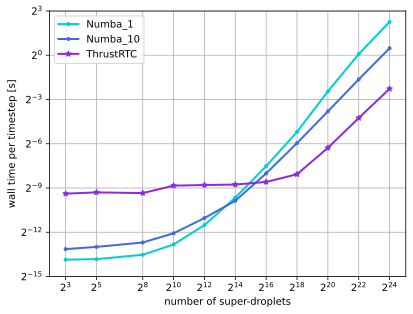

HTML(value="<a href='./breakup_n_steps100_double_selected.pdf' target='_blank'>./breakup_n_steps100_double_sel…

In [378]:
gmum_breakup_double_selected = get_dict_with_selected_backends(gmum_breakup_double)

plot_processed_results(
    gmum_breakup_double_selected, 
    plot_title=None, #'Breakup double precision (n_steps: 100)', metric='min'
    plot_filename='breakup_n_steps100_double_selected.pdf',
    markers={'Numba_1': '.', 'Numba_10': '.', 'ThrustRTC': '*'},
    colors={'Numba_1': 'darkturquoise', 'Numba_10': 'royalblue', 'ThrustRTC': 'blueviolet'}
)

## Coalescence + Breakup

In [41]:
gmum_coal_breakup_double = {**gmum_cpu_coal_breakup_double_2048, **gmum_gpu_coal_breakup_double_2048}

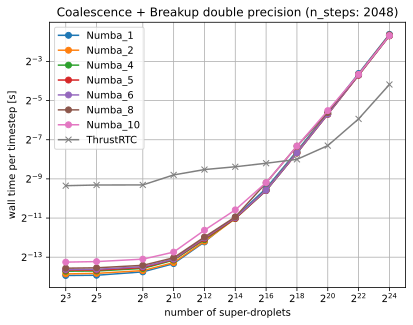

In [42]:
plot_processed_results(
    gmum_coal_breakup_double, plot_title='Coalescence + Breakup double precision (n_steps: 2048)', metric='min'
)

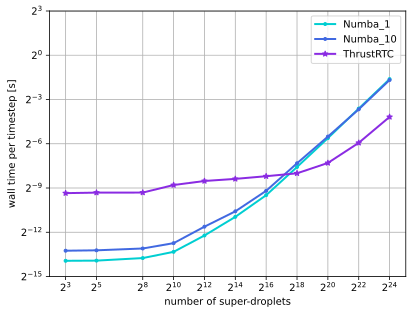

HTML(value="<a href='./coal_breakup_n_steps2048_double_selected.pdf' target='_blank'>./coal_breakup_n_steps204…

In [379]:
gmum_coal_breakup_double_selected = get_dict_with_selected_backends(gmum_coal_breakup_double)

plot_processed_results(
    gmum_coal_breakup_double_selected, 
    plot_title=None, #'Coalescence + Breakup double precision (n_steps: 100)', metric='min'
    plot_filename='coal_breakup_n_steps2048_double_selected.pdf',
    markers={'Numba_1': '.', 'Numba_10': '.', 'ThrustRTC': '*'},
    colors={'Numba_1': 'darkturquoise', 'Numba_10': 'royalblue', 'ThrustRTC': 'blueviolet'}
)

In [68]:
def cpu_vs_gpu_difference_n_times(d):
    res_cpu = d['Numba_1']
    res_gpu = d['ThrustRTC']

    for n_sd in res_cpu.keys():
        v_cpu = res_cpu[n_sd]['min']
        v_gpu = res_gpu[n_sd]['min']

        print('n_sd:', n_sd, 'v_cpu/v_gpu:', v_cpu/v_gpu)



In [69]:
cpu_vs_gpu_difference_n_times(gmum_breakup_double_selected)

n_sd: 8 v_cpu/v_gpu: 0.04494056525088658
n_sd: 32 v_cpu/v_gpu: 0.04349703831446352
n_sd: 256 v_cpu/v_gpu: 0.05521257593104121
n_sd: 1024 v_cpu/v_gpu: 0.06301611936125434
n_sd: 4096 v_cpu/v_gpu: 0.15267079270374162
n_sd: 16384 v_cpu/v_gpu: 0.5410319134797488
n_sd: 65536 v_cpu/v_gpu: 2.099895008550614
n_sd: 262144 v_cpu/v_gpu: 7.328793326842134
n_sd: 1048576 v_cpu/v_gpu: 14.14638203933145
n_sd: 4194304 v_cpu/v_gpu: 20.245900387920475
n_sd: 16777216 v_cpu/v_gpu: 23.163839564765787


In [70]:
cpu_vs_gpu_difference_n_times(gmum_coalescence_double_selected)

n_sd: 8 v_cpu/v_gpu: 0.04242160502501477
n_sd: 32 v_cpu/v_gpu: 0.042274423906483984
n_sd: 256 v_cpu/v_gpu: 0.048212244018365435
n_sd: 1024 v_cpu/v_gpu: 0.04559187206970344
n_sd: 4096 v_cpu/v_gpu: 0.09399430920949108
n_sd: 16384 v_cpu/v_gpu: 0.2705422924223351
n_sd: 65536 v_cpu/v_gpu: 0.9036598810948513
n_sd: 262144 v_cpu/v_gpu: 2.6644854043210295
n_sd: 1048576 v_cpu/v_gpu: 5.685633180181443
n_sd: 4194304 v_cpu/v_gpu: 6.942895116693314
n_sd: 16777216 v_cpu/v_gpu: 7.438496324984258


In [51]:
gmum_breakup_double['Numba_1'][8]['min']

6.731510162353515e-05

In [372]:
import math
from perf_comp.utils import __plot_get_sorted_backend_list

def compute_speedup_times(
    res_d, 
    baseline_backend='Numba_1', 
    selected_backends=['Numba_1', 'Numba_2', 'Numba_4', 'Numba_8', 'Numba_10', 'ThrustRTC'],
    filename=None,
):
    baseline = res_d[baseline_backend]
    
    backends = __plot_get_sorted_backend_list(res_d)
    n_sds = list(res_d[baseline_backend].keys())

    lines = []
    lines.append('\\begin{table}[]')
    lines.append('\\begin{tabular}{' + 'l' * (len(n_sds) +1) + '} \\\\')
    
    lines.append('\multirow{2}{*}{Backends} & \multicolumn{' + str(len(n_sds)) + '}{l}{Number of super-droplets} \\\\')
    
    # lines.append('Backends, Number of super-droplets')
    print(lines[-1])

    

    tmp = [f' $2^{{{int(math.log2(k))}}}$ ' for k in n_sds]
    
    lines.append('& ' + ' & '.join(tmp) + ' \\\\')
    print(lines[-1])
    for backend in backends:
        if backend not in selected_backends:
            continue
        
        tmp = []
        for n_sd in n_sds:
            baseline_min_val = baseline[n_sd]['min']
            min_val = res_d[backend][n_sd]['min']
    
            log_n_sd = int(math.log2(n_sd))

            tmp_coef = baseline_min_val/min_val
            n_digits = 4
            if tmp_coef > 0.1:
                n_digits = 3
            if tmp_coef > 1:
                n_digits = 2
            if tmp_coef > 10:
                n_digits = 1
                
            coef = round(tmp_coef, n_digits)
            tmp.append(f'{coef}')

        tmp = ' & '.join(tmp)

        if 'Numba_' in backend:
            backend = 'Numba\_' + backend[6:]
        lines.append(backend + ' & ' + tmp + ' \\\\')
        print(lines[-1])

    lines.append('\end{tabular}')
    lines.append('\end{table}')
    
    if filename:
        with open(filename, 'w') as f:
            for line in lines:
                f.write(line + '\n')


In [373]:
compute_speedup_times(gmum_breakup_double, filename='table_speedup.tex')

\multirow{2}{*}{Backends} & \multicolumn{11}{l}{Number of super-droplets} \\
&  $2^{3}$  &  $2^{5}$  &  $2^{8}$  &  $2^{10}$  &  $2^{12}$  &  $2^{14}$  &  $2^{16}$  &  $2^{18}$  &  $2^{20}$  &  $2^{22}$  &  $2^{24}$  \\
Numba\_1 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 \\
Numba\_2 & 0.911 & 0.882 & 0.726 & 0.562 & 0.542 & 0.694 & 0.817 & 0.999 & 1.36 & 1.54 & 1.58 \\
Numba\_4 & 0.827 & 0.781 & 0.66 & 0.591 & 0.614 & 0.838 & 0.966 & 1.18 & 1.82 & 2.32 & 2.37 \\
Numba\_8 & 0.756 & 0.695 & 0.656 & 0.643 & 0.729 & 1.14 & 1.35 & 1.63 & 2.34 & 2.96 & 3.03 \\
Numba\_10 & 0.608 & 0.563 & 0.563 & 0.592 & 0.72 & 1.16 & 1.41 & 1.69 & 2.56 & 3.29 & 3.44 \\
ThrustRTC & 0.0449 & 0.0435 & 0.0552 & 0.063 & 0.153 & 0.541 & 2.1 & 7.33 & 14.1 & 20.2 & 23.2 \\


In [374]:
compute_speedup_times(gmum_breakup_scaled, filename='table_speedup_scaled.tex')

\multirow{2}{*}{Backends} & \multicolumn{11}{l}{Number of super-droplets} \\
&  $2^{3}$  &  $2^{5}$  &  $2^{8}$  &  $2^{10}$  &  $2^{12}$  &  $2^{14}$  &  $2^{16}$  &  $2^{18}$  &  $2^{20}$  &  $2^{22}$  &  $2^{24}$  \\
Numba\_1 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 \\
Numba\_2 & 0.922 & 0.888 & 0.725 & 0.597 & 0.594 & 0.734 & 0.829 & 0.994 & 1.3 & 1.56 & 1.63 \\
Numba\_4 & 0.853 & 0.786 & 0.689 & 0.637 & 0.673 & 0.941 & 1.03 & 1.23 & 1.7 & 2.32 & 2.36 \\
Numba\_8 & 0.747 & 0.684 & 0.66 & 0.674 & 0.751 & 1.21 & 1.41 & 1.68 & 2.27 & 3.01 & 3.11 \\
Numba\_10 & 0.601 & 0.557 & 0.562 & 0.619 & 0.774 & 1.24 & 1.43 & 1.72 & 2.45 & 3.41 & 3.53 \\
ThrustRTC & 0.0401 & 0.039 & 0.0484 & 0.0596 & 0.151 & 0.532 & 1.99 & 6.95 & 12.8 & 19.7 & 23.6 \\


In [375]:
compute_speedup_times(gmum_breakup_double, filename='table_speedup_baseline_numba10.tex', selected_backends=['Numba_10', 'ThrustRTC'], baseline_backend='Numba_10')

\multirow{2}{*}{Backends} & \multicolumn{11}{l}{Number of super-droplets} \\
&  $2^{3}$  &  $2^{5}$  &  $2^{8}$  &  $2^{10}$  &  $2^{12}$  &  $2^{14}$  &  $2^{16}$  &  $2^{18}$  &  $2^{20}$  &  $2^{22}$  &  $2^{24}$  \\
Numba\_10 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 & 1.0 \\
ThrustRTC & 0.074 & 0.0772 & 0.0981 & 0.107 & 0.212 & 0.467 & 1.49 & 4.33 & 5.53 & 6.15 & 6.73 \\


In [376]:
23.1638 / 3.4439

6.726037341386219

In [111]:
's'*20

'ssssssssssssssssssss'